### Setup:
#### Run the following setup cell
(You can run cells by either clicking run in the toolbar or CTRL+ENTER while in the cell)

In [9]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

os.chdir(r'C:\Users\hopem\OneDrive\Desktop\Spring 2020\Biomedical Health Informatics\Project\Data')
df_N_g = pd.read_excel('ProcessedData.xlsx', sheet_name = 'Norway2')
df_A_g = pd.read_excel('ProcessedData.xlsx', sheet_name = 'Australia2')
df_wkNm = pd.read_excel('ProcessedData.xlsx', sheet_name = 'WeekNum')

week = widgets.IntSlider(
    min=1,
    max=20,
    step=1,
    description='Week:',
    value=1
)

n_estimators = widgets.IntSlider(
    min = 100,
    max = 10000,
    step = 100,
    description = 'n_estimators:',
    value = 100
)

country = widgets.Dropdown(
    options=['Australia', 'Norway'],
    value='Australia',
    description='Country:',
    disabled=False,
)


### Parameter Selection:
#### Run the cell below and select the parameters

In [10]:
print("Which country do you want to analyze?")
display(country)
print("What week do you want to predict out of the test weeks?")
display(week)
print("How many n_estimators do you want to include in the random forest model?")
display(n_estimators)
print("(The more n_estimators you choose, the longer the model will take)")

Which country do you want to analyze?


Dropdown(description='Country:', options=('Australia', 'Norway'), value='Australia')

What week do you want to predict out of the test weeks?


IntSlider(value=1, description='Week:', max=20, min=1)

How many n_estimators do you want to include in the random forest model?


IntSlider(value=100, description='n_estimators:', max=10000, min=100, step=100)

(The more n_estimators you choose, the longer the model will take)


### Model:
#### After adjusting the parameters above, run the below cell to get the results of the model

In [13]:
if country.value == "Australia":
    df_g = df_A_g
else:
    df_g = df_N_g

df_g = df_g.drop(df_g.index[range(0,8)])
n,m = df_g.shape
X_g = df_g.iloc[:,range(8,m)]
y_g = df_g.iloc[:,4]

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, train_size = 84, test_size = 20)
wk_num = X_test_g.iloc[week.value,0]
X_train_g.drop(columns=["Week Num.1"])
X_test_g.drop(columns=["Week Num.1"])

rf_g = RandomForestRegressor(n_estimators = n_estimators.value, oob_score = True)
rf_g.fit(X_train_g, y_train_g)
predictions_g = rf_g.predict(X_test_g)
errors_g = (predictions_g - y_test_g)**2
MSE_g = np.sum(errors_g)/len(predictions_g)

print('Week number is:',wk_num)

print('Mean Sqaure Error:', MSE_g)

print('OOB Error Score is:', rf_g.oob_score_)

predictions_g_single = predictions_g[week.value]
errors_g_single = errors_g.iloc[week.value]
y_test_g_single = y_test_g.iloc[week.value]

print('Actual value is:',y_test_g_single)
print('Predicted value is:',predictions_g_single)

Week number is: 201951
Mean Sqaure Error: 85957.39525682224
OOB Error Score is: 0.9253734659995521
Actual value is: 654
Predicted value is: 393.8233333333333


### Actual vs. Predicted Flu Count values for 2019
#### Run the following cell to get the plot for the model using the parameters chosen

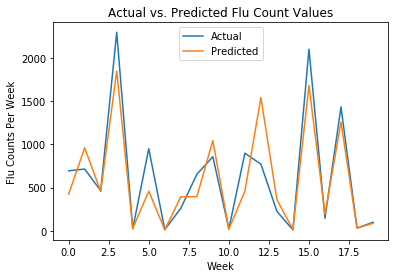

In [14]:
plt.title("Actual vs. Predicted Flu Count Values")
plt.xlabel("Week")
plt.ylabel("Flu Counts Per Week")
plt.plot(range(len(y_test_g)),y_test_g, label = 'Actual')
plt.plot(range(len(predictions_g)),predictions_g, label = 'Predicted')
leg = plt.legend()